# Importing Libraries

In [1]:
#data processing
import pandas as pd
#linear algebra
import numpy as np
#data visualisation
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


# Data imputing

In [2]:
#loading datasets
orders=pd.read_csv('../input/retail-store-analysis/TR_OrderDetails.csv')
products=pd.read_csv('../input/retail-store-analysis/TR_Products.csv')
props=pd.read_csv('../input/retail-store-analysis/TR_PropertyInfo.csv')

In [3]:
#understanding shape of the data
print('Orders, Products and Props datasets have',orders.shape,products.shape,props.shape,'rows and columns respectively')

Orders, Products and Props datasets have (5000, 5) (94, 4) (20, 3) rows and columns respectively


In [4]:
#merging the datasets
df=orders.merge(products,left_on='ProductID',right_on='ProductID',how='left')
df.head()

,OrderID,OrderDate,PropertyID,ProductID,Quantity,ProductName,ProductCategory,Price
0,1,01-01-2015,17,41,1,Office Chair,Furnishings,85
1,2,01-01-2015,15,54,2,Chest of Drawers,Furnishings,150
2,3,01-01-2015,5,71,2,Hammer,Maintenance,17
3,4,01-01-2015,19,3,2,Washcloth,Housekeeping,3
4,5,01-01-2015,12,45,3,Computer Desk,Furnishings,102


In [5]:
data=df.merge(props,left_on='PropertyID',right_on='Prop ID',how='left')
data.head()

,OrderID,OrderDate,PropertyID,ProductID,Quantity,ProductName,ProductCategory,Price,Prop ID,PropertyCity,PropertyState
0,1,01-01-2015,17,41,1,Office Chair,Furnishings,85,17,Las Vegas,Nevada
1,2,01-01-2015,15,54,2,Chest of Drawers,Furnishings,150,15,Chicago,Illinois
2,3,01-01-2015,5,71,2,Hammer,Maintenance,17,5,Kansas City,Missouri
3,4,01-01-2015,19,3,2,Washcloth,Housekeeping,3,19,Los Angeles,California
4,5,01-01-2015,12,45,3,Computer Desk,Furnishings,102,12,Dallas,Texas


In [6]:
#Calculating Total Sales
data['Total Sales']= data['Quantity']*data['Prop ID']
data.head()

,OrderID,OrderDate,PropertyID,ProductID,Quantity,ProductName,ProductCategory,Price,Prop ID,PropertyCity,PropertyState,Total Sales
0,1,01-01-2015,17,41,1,Office Chair,Furnishings,85,17,Las Vegas,Nevada,17
1,2,01-01-2015,15,54,2,Chest of Drawers,Furnishings,150,15,Chicago,Illinois,30
2,3,01-01-2015,5,71,2,Hammer,Maintenance,17,5,Kansas City,Missouri,10
3,4,01-01-2015,19,3,2,Washcloth,Housekeeping,3,19,Los Angeles,California,38
4,5,01-01-2015,12,45,3,Computer Desk,Furnishings,102,12,Dallas,Texas,36


In [7]:
data.shape

(5000, 12)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   OrderID          5000 non-null   int64 
 1   OrderDate        5000 non-null   object
 2   PropertyID       5000 non-null   int64 
 3   ProductID        5000 non-null   int64 
 4   Quantity         5000 non-null   int64 
 5   ProductName      5000 non-null   object
 6   ProductCategory  5000 non-null   object
 7   Price            5000 non-null   int64 
 8   Prop ID          5000 non-null   int64 
 9   PropertyCity     5000 non-null   object
 10  PropertyState    5000 non-null   object
 11  Total Sales      5000 non-null   int64 
dtypes: int64(7), object(5)
memory usage: 507.8+ KB


In [9]:
data.describe()

,OrderID,PropertyID,ProductID,Quantity,Price,Prop ID,Total Sales
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2500.500000,10.541400,47.162600,2.019200,52.919000,10.541400,21.145800
std,1443.520003,5.719478,27.355004,0.811519,57.552297,5.719478,14.786746
min,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000
25%,1250.750000,6.000000,23.000000,1.000000,17.000000,6.000000,9.000000
50%,2500.500000,11.000000,47.000000,2.000000,30.000000,11.000000,18.000000
75%,3750.250000,15.000000,70.000000,3.000000,75.000000,15.000000,30.000000
max,5000.000000,20.000000,94.000000,3.000000,300.000000,20.000000,60.000000


In [10]:
#check for nulls
data.isnull().sum()

OrderID            0
OrderDate          0
PropertyID         0
ProductID          0
Quantity           0
ProductName        0
ProductCategory    0
Price              0
Prop ID            0
PropertyCity       0
PropertyState      0
Total Sales        0
dtype: int64

In [11]:
#1. Maximum quantity sold in any transaction
data['Quantity'].max()

3

In [12]:
#2. Unique products in all the transactions
print("There are" ,data['ProductName'].nunique(),"unique products in the store")

There are 94 unique products in the store


In [13]:
data['ProductName'].unique

<bound method Series.unique of 0           Office Chair
1       Chest of Drawers
2                 Hammer
3              Washcloth
4          Computer Desk
              ...       
4995        Swivel Chair
4996     Wireless Router
4997      Large Area Rug
4998     Wireless Router
4999             Tissues
Name: ProductName, Length: 5000, dtype: object>

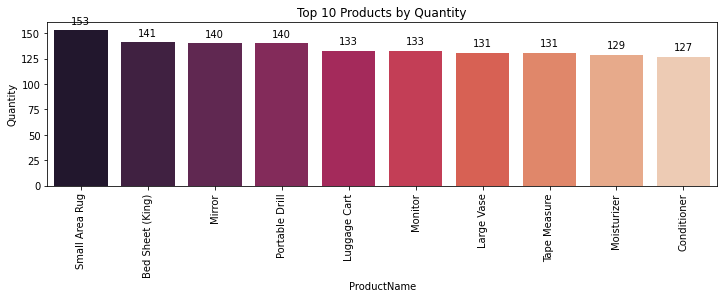

In [14]:
#Total sales of each product
#By quantity
Top_by_quant=pd.DataFrame(data.groupby(['ProductName']).sum()['Quantity']).sort_values(by='Quantity',ascending=False)
Top_by_quant=Top_by_quant.reset_index()
#Plotting Top 10
plt.figure(figsize=(12,3))
graph1=sns.barplot(data=Top_by_quant.head(10),x='ProductName',y='Quantity',palette='rocket')
graph1.set(title='Top 10 Products by Quantity')
plt.xticks(rotation=90)
#plt.show()

for p in graph1.patches:
    graph1.annotate(format(p.get_height(), '1.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9) ,
                   textcoords = 'offset points')

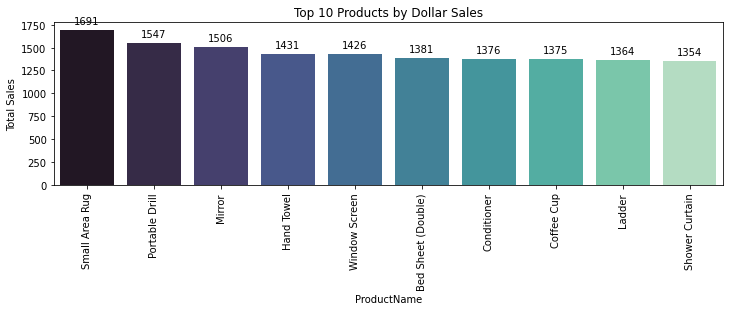

In [15]:
#By Sales
Top_by_sales=pd.DataFrame(data.groupby(['ProductName']).sum()['Total Sales']).sort_values(by='Total Sales',ascending=False)
Top_by_sales=Top_by_sales.reset_index()
#Plotting Top 10
plt.figure(figsize=(12,3))
graph2=sns.barplot(data=Top_by_sales.head(10),x='ProductName',y='Total Sales',palette='mako')
graph2.set(title='Top 10 Products by Dollar Sales')
plt.xticks(rotation=90)
#plt.show()

for a in graph2.patches:
    graph2.annotate(format(a.get_height(),'1.0f'),
                   (a.get_x()+a.get_width()/2,a.get_height()),
                   ha="center",va="center",
                   xytext=(0,9),
                   textcoords='offset points')

In [16]:
#Products distribution by category
prod_cat=pd.DataFrame(data.groupby(['ProductCategory','ProductName']).sum()['Quantity'])
prod_cat=prod_cat.reset_index().sort_values(by=['ProductCategory','Quantity'],ascending=False)
#Top 5 Products in each category by quantity sold
Top_5_prod_cat=prod_cat.groupby('ProductCategory').head(5)

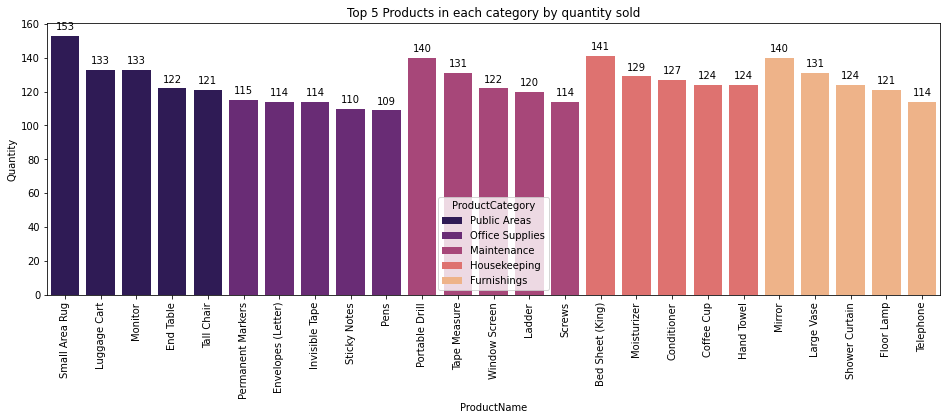

In [17]:
plt.figure(figsize=(16,5))
graph3=sns.barplot(data=Top_5_prod_cat,x='ProductName',y='Quantity',hue='ProductCategory',dodge=False,palette='magma')
graph3.set(title='Top 5 Products in each category by quantity sold')
plt.xticks(rotation=90)
#plt.show()

for a in graph3.patches:
    graph3.annotate(format(a.get_height(),'1.0f'),
                   (a.get_x()+a.get_width()/2,a.get_height()),
                   ha="center",va="center",
                   xytext=(0,9),
                   textcoords='offset points')

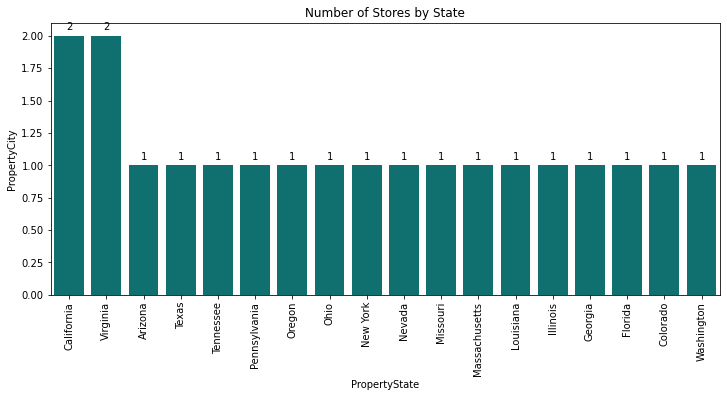

In [18]:
#Distribution of stores amongst states
stores_by_city=pd.DataFrame(data.groupby(['PropertyState']).nunique()['PropertyCity'])
stores_by_city=stores_by_city.reset_index().sort_values(by='PropertyCity',ascending=False)
plt.figure(figsize=(12,5))
graph4=sns.barplot(data=stores_by_city,x='PropertyState',y='PropertyCity',color='teal')
graph4.set(title='Number of Stores by State')
plt.xticks(rotation=90)
#plt.show()

for a in graph4.patches:
    graph4.annotate(format(a.get_height(),'1.0f'),
                   (a.get_x()+a.get_width()/2,a.get_height()),
                   ha="center",va="center",
                   xytext=(0,9),
                   textcoords='offset points')


In [19]:
#Top 5 properties that registered highest sales
highest_sales=pd.DataFrame(data.groupby(['PropertyCity']).sum()['Total Sales'])
highest_sales=highest_sales.reset_index().sort_values(by='Total Sales',ascending=False)
highest_sales.head(5)

,PropertyCity,Total Sales
9,Los Angeles,9956
18,San Francisco,9260
8,Las Vegas,8942
3,Chicago,8085
15,Phoenix,7848
